#Importing Libraries

In [1]:
import pandas as pd#Data processing
import numpy as np#Linear Algebra
import matplotlib.pyplot as plt#plots

#Loading dataset

In [2]:
with open("spambase.names") as df:
  print(df.read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [3]:
#reading/locating the file
spambase = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data")

In [4]:
#Assigning column names to our dataframe
spambase.columns = ['word_freq_make','word_freq_address',
                'word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
                'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail',
                'word_freq_receive','word_freq_will','word_freq_people','word_freq_report',
                'word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
                'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000',
                'word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650',
                'word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
                'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
                'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original',
                'word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
                'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average',
                'capital_run_length_longest','capital_run_length_total','email_spam']

In [5]:
#Viewing the dataset
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,email_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


#Accessing information

In [6]:
#checking for info
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [7]:
#checking for number of rows and columns
spambase.shape

(4600, 58)

In [8]:
#checking for datatypes
spambase.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [9]:
#seeing if we have duplicated values
spambase.duplicated().sum()

391

In [10]:
#checking for missing values
spambase.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [11]:
#Checking for Anomalies/outliers
Q1 = spambase.quantile(0.25)
Q3 = spambase.quantile(0.75)
IQR = Q3 - Q1

In [12]:
((spambase < (Q1 - 1.5 * IQR)) | (spambase > (Q3 + 1.5 * IQR))).sum()

word_freq_make                1053
word_freq_address              897
word_freq_all                  338
word_freq_3d                    47
word_freq_our                  501
word_freq_over                 999
word_freq_remove               807
word_freq_internet             824
word_freq_order                773
word_freq_mail                 852
word_freq_receive              709
word_freq_will                 270
word_freq_people               852
word_freq_report               357
word_freq_addresses            336
word_freq_free                 956
word_freq_business             963
word_freq_email               1037
word_freq_you                   75
word_freq_credit               424
word_freq_your                 229
word_freq_font                 117
word_freq_000                  679
word_freq_money                735
word_freq_hp                  1090
word_freq_hpl                  811
word_freq_george               780
word_freq_650                  463
word_freq_lab       

* The dataset contains duplicated values

* The dataset does not have any missing values

* The dataset contains outliers

#Data Cleaning

In [13]:
#Dropping duplicated values
spambase.drop_duplicates(inplace = True)

In [14]:
#confirming if we still have duplicated values
spambase.duplicated().any()

False

In [15]:
#Correcting Outliers, filtering out the outliers by keeping only valid values
spambase = spambase[~((spambase < (Q1 - 1.5 * IQR)) |(spambase > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,email_spam
15,0.0,0.0,0.0,0.0,0.94,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.88,0.0,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428,0.0,0.0,4.652,31,107,1
234,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.29,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.103,3,32,1
307,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.309,0.0,0.0,1.333,11,56,1
322,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.266,4,19,1
467,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.22,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.546,0.0,0.0,2.300,9,23,1


#Univariate Analysis

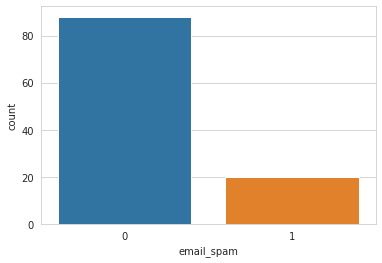

In [17]:
#Visualising count of email spams
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(spambase['email_spam'])

* Most emails are not spam

In [18]:
# creating a subset of columns to see how the values are distributed
subset =spambase[['capital_run_length_average', 'capital_run_length_longest', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'word_freq_you', 'word_freq_your', 'word_freq_font']]


for i in subset:
  print(i, spambase[i].unique())

capital_run_length_average [4.652 1.103 1.333 1.266 2.3   2.363 3.    3.871 1.    1.055 4.307 1.909
 1.545 2.5   1.938 2.285 1.437 2.    1.5   1.142 1.6   1.666 1.625 2.2
 1.733 1.222 1.888 1.75  1.375 2.375 1.88  1.875 1.166 1.125 1.655 1.555
 2.25  2.666 2.222 2.166 6.666 3.333 1.4   2.09  2.636 1.23  2.8   4.25
 2.187 1.8   1.866 5.846 3.888 1.428 2.094 3.25  5.5   1.454 1.714 1.769
 3.5   2.084 3.587 1.419 2.272 1.25  2.333]
capital_run_length_longest [31  3 11  4  9 16 26  1 15 33  7  5  6  2 23 13  8 12 10 17 21 55]
word_freq_edu [0.]
word_freq_table [0.]
word_freq_conference [0.]
word_freq_you [1.88 1.29 0.   3.22 4.   0.81 6.55 4.76 2.17 2.46 1.14 3.75 3.84 4.16
 3.33 5.55 3.57 4.34 2.43 4.54 5.88 1.   1.56 2.08 0.92 3.7  1.2  2.94
 1.92 0.48 2.73 4.37 3.79]
word_freq_your [2.83 0.64 1.81 0.   1.63 2.17 2.46 2.67 1.   1.16 0.92 2.77 2.94 1.92
 0.62]
word_freq_font [0.]


#Bivariate Analysis

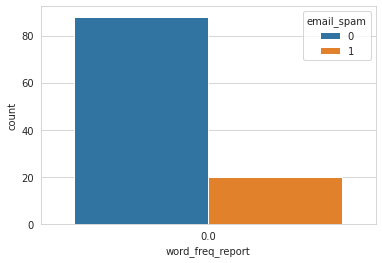

In [19]:
sns.countplot(spambase['word_freq_report'], hue = spambase['email_spam'])

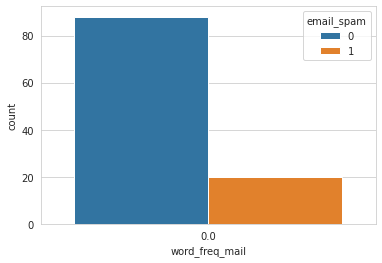

In [20]:
sns.countplot(spambase['word_freq_mail'], hue = spambase['email_spam'])

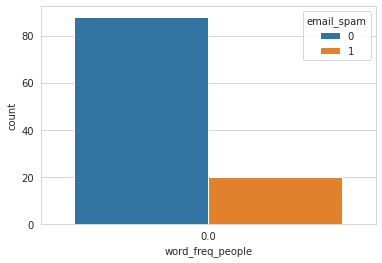

In [21]:
sns.countplot(spambase['word_freq_people'], hue = spambase['email_spam'])

In [22]:
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,email_spam
15,0.0,0.0,0.0,0.0,0.94,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.88,0.0,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428,0.0,0.0,4.652,31,107,1
234,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.29,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.103,3,32,1
307,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.309,0.0,0.0,1.333,11,56,1
322,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.266,4,19,1
467,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.22,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.546,0.0,0.0,2.300,9,23,1


#Normality Test

Shapiro Wilk Test

In [32]:
from scipy.stats import shapiro
stat, p = shapiro(spambase['word_freq_415'])
print('stat=%.3f, p=%.3f\n' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')

else:
  print('Probably not Gaussian')

stat=1.000, p=1.000

Probably Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [24]:
stat, p = shapiro(spambase['char_freq_;'])
print('stat=%.3f, p=%.3f\n' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')

else:
  print('Probably not Gaussian')

stat=1.000, p=1.000

Probably Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [31]:
stat, p = shapiro(spambase['word_freq_3d'])
print('stat=%.3f, p=%.3f\n' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')

else:
  print('Probably not Gaussian')

stat=1.000, p=1.000

Probably Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [29]:
stat, p = shapiro(spambase['word_freq_1999'])
print('stat=%.3f, p=%.3f\n' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')

else:
  print('Probably not Gaussian')

stat=1.000, p=1.000

Probably Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [33]:
stat, p = shapiro(spambase['word_freq_addresses'])
print('stat=%.3f, p=%.3f\n' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')

else:
  print('Probably not Gaussian')

stat=1.000, p=1.000

Probably Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [34]:
stat, p = shapiro(spambase['word_freq_data'])
print('stat=%.3f, p=%.3f\n' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')

else:
  print('Probably not Gaussian')

stat=1.000, p=1.000

Probably Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [35]:
stat, p = shapiro(spambase['word_freq_george'])
print('stat=%.3f, p=%.3f\n' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')

else:
  print('Probably not Gaussian')

stat=1.000, p=1.000

Probably Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [37]:
stat, p = shapiro(spambase['email_spam'])
print('stat=%.3f, p=%.3f\n' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')

else:
  print('Probably not Gaussian')

stat=0.473, p=0.000

Probably not Gaussian


Creating a subset of variables which are normal distributed into to build our model

In [38]:
subset = spambase[['word_freq_415','char_freq_;','word_freq_3d','word_freq_1999','word_freq_addresses','word_freq_data','word_freq_george','email_spam']]

In [39]:
subset.head()

,word_freq_415,char_freq_;,word_freq_3d,word_freq_1999,word_freq_addresses,word_freq_data,word_freq_george,email_spam
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#Checking for Multicollinearity

In [46]:
#Data pre-processing
X = subset.iloc[:, :-1].values
y = subset.iloc[:, -1].values

In [47]:
print(X)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.

In [45]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(subset)

pd.Series([variance_inflation_factor(x.values, i)
for i in range(x.shape[1])], index=x.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const                  1.227273
word_freq_415               NaN
char_freq_;                 NaN
word_freq_3d                NaN
word_freq_1999              NaN
word_freq_addresses         NaN
word_freq_data              NaN
word_freq_george            NaN
email_spam             1.000000
dtype: float64

#Naive Bayes Classifier

#Gaussian Naive Bayes Classifier

In [49]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
#Training the naive bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


#Making the Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16  0]
 [ 6  0]]


0.7272727272727273

* With Gaussian naive Bayes classifier where the dataset was split into 20% test set and 80% training set we managed to achieve an accuracy of 72%

#1.Splitting the dataset into 70-30

In [56]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [57]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
#Training the naive bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


In [60]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25  0]
 [ 8  0]]


0.7575757575757576

* By splitting our dataset into 30% test set and 70% training set we achieved slightly higher accuracy of 75%

#2.Splitting the dataset into 60-40

In [61]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [62]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
#Training the naive bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


In [65]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[34  0]
 [10  0]]


0.7727272727272727

* By splitting the dataset into 40% test set and 60% training set we achieve a higher accuracy of 77%

#Multinominal Naive Bayes Classifier

In [76]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [77]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
#Training the naive bayes model on the training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[34  0]
 [10  0]]


0.7727272727272727

*After tuning our parameter to multinomial naive bayes classifiers and including the best performing split of 40-60 we get an accuracy of 77%